In [1]:
from time import sleep
from random import randint
from IPython.core.display import clear_output
from warnings import warn
from selenium import webdriver
from bs4 import BeautifulSoup
import pandas as pd
#from selenium.webdriver.common.keys import Keys  
from selenium.webdriver.chrome.options import Options  
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import os
##################################
os.getcwd()
os.chdir(r'C:\Users\Tewodata\Desktop\hdlss')
chrome_options = Options()
chrome_options.add_argument("--headless")
chrome_driver = os.getcwd() +"\\chromedriver.exe"


The website we're going to scrap is www.filmweb.no which lists, among other, most watched movies every weekend.
We want get movie title, date of premiere date, views, and rank for each movie in each week in 2017.
The only parameter that changes for each week is the last digit at the end of the url as shown below. 
https://www.filmweb.no/filmtoppen/#view=weekend&back=1
For example for first week of 2017 is becomes https://www.filmweb.no/filmtoppen/#view=weekend&back=70
at the time I write this!
Now let us create empty lists to store screenshots of all urls, url lists, and some lists to store responses from scrapped objects

In [3]:
#warn('Warning:Scraping running')
screenshot=[]
all_soups={}
url_list=[]
title=[]
premiered=[]
views_in_week=[]
total_views=[]
rank=[]  
start_time= time.time()
#For every weekend in 2017
def geturl(): 
    #geturl() parses urls for each week in 2017 and returns list of urls to scraper 
    pages_url=[str(i) for i in range(38,58)]
    for weekend_url in pages_url:
        url = 'https://www.filmweb.no/filmtoppen/#view=weekend&back='+weekend_url
        url_list.append(url)
    print('request is sent')
    return scraper(url_list)

Once we finish arranging our urls, the next step is passing to scraper function which opens each url and read content of each url.
Not to overload the server we have to limit our request to accebtible rate, and we need frequency of our request for that.
We're gonna use headless chrome, to confirm request and response for each url, we need screenshot of the url like


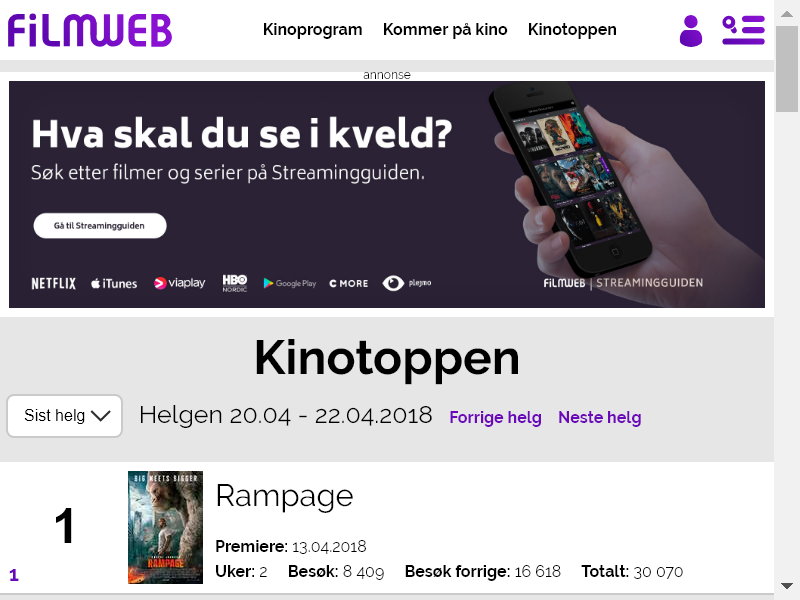

In [4]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename=r'C:\Users\Tewodata\Desktop\hdlss\capture1.png',unconfined=True, width="500")



In [5]:
# Scraper takes url list from crawler and gets html object     
def scraper(url_list):
    #Parser gets url from geturl and for each return html object
    for i in range(len(url_list)):
        #Create driver object for headless chrome
        driver = webdriver.Chrome(chrome_options=chrome_options, executable_path=chrome_driver)        
        driver.get(url_list[i])  
        #Since our browser is headless, we need screenshot of the browser to make sure that every url we provided 
        #was accessed properly
        screenshot.append(driver.get_screenshot_as_file("capture.png"))
        #Wait 7 seconds until the button fully loads
        WebDriverWait(driver, 7).until(EC.visibility_of_element_located((By.XPATH,
                                                                         '//button[text()="Se hele listen"]'))).click()           
        html = driver.page_source
        #soup=soup.format(weekend_url)
        soup= BeautifulSoup(html,'html.parser')
        #Save html object for in all_soups which stores all responses of the driver.page_source
        all_soups[i]=soup
        elapsed_time =time.time() - start_time
        requests=i+1
        print('Request: {}; Frequency: {} requests/s'.format(requests,requests/elapsed_time))        
        clear_output(wait=True)
        driver.close()
        sleep(randint(10,11))
    warn('Scraping completed successfully')      
    return parser(all_soups) 
########################################################## 

 # time to pars
Time to parse the html response from scrape function above.Parser(all_soups) loops through html response of 
the scraper function, get elements and store the value in corresponding list. 


In [ ]:
   
def parser(all_soups):
    for i in all_soups.keys():
        soup=all_soups[i]              
        film_container=soup.find('ol', class_='weekend')    
        lists=film_container.find_all('li')
        for item in lists:
            #get title of the movie
            film_title=item.find('div',class_='title').text
            title.append(film_title)
            #get premiered week
            prem=item.find('div', class_= 'premiere').text
            premiered.append(prem.split(':')[1])
            current_rank=item.find('div', class_='column position').span.text
            #get the views in the current week number, values are usually in nested spans
            spans=item.find_all('span')
            rank.append(current_rank)
            for nested_spans in spans:
                if_nested=nested_spans.find_all('span')
                if len(if_nested)!=0:
                    valuesnested=nested_spans.text.split(':')
                    if valuesnested[0]=='Totalt':
                        total_views.append(valuesnested[1])
                        
    print('parser is complete')
    warn('warning from pars')
    return pd_dataframe_converter(premiered,title,total_views,rank)


In [6]:
def pd_dataframe_converter(premiered,title,total_views,rank):
    scraped_df = pd.DataFrame({'premiered': premiered,
                                  'title': title,
                                 'total_views':total_views,
                                  'rank':rank},columns=['title', 'premiered', 'total_views','rank'])
    os.getcwd()
    os.chdir(r'C:\Users\Tewodata\Desktop\hdlss')
    scraped_df.to_csv('movie_2017f.csv')
    print('Converting to dataframe for  request is complete')
    #clear_output(wait=True)
    
################################################¤¤¤¤¤¤¤######